# Project 3 - Clustering
## Hotel customer segmentation
### This notebook uses the dateset *HotelCustomersDataset.tsv*

## Group E

## 0. Dataset description

# Loading the dataset and visualizing summary statistics

In [205]:
import pandas as pd

pd.set_option("display.max_colwidth", None)
variables = pd.read_excel("variables.xlsx", engine="openpyxl")
variables.head(31)

,Variable,Type,Description
0,ID,Numeric,Customer ID
1,Nationality,Categorical,Country of origin. Categories are represented in the ISO 3155–3:2013 format [1]
2,Age,Numeric,Customer's age (in years) at the last day of the extraction period.
3,DaysSinceCreation,Number,Number of days since the customer record was created (number of days elapsed between the creation date and the last day of the extraction period)
4,NameHash,Categorical,"Name of the customer's SHA2–256 hash string. A hash-string is the string resulting from a mathematical function that maps a string of arbitrary length to fixed-length [2]. Hash functions are used for different purposes. In this case, to allow customer's anonymization."
5,DocIDHash,Categorical,"SHA2–256 hash-string of the identification document number the customer provided at check-in (passport number, national ID card number, or other)"
6,AverageLeadTime,Numeric,"The average number of days elapsed between the customer's booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customer"
7,LodgingRevenue,Numeric,"Total amount spent on lodging expenses by the customer (in Euros). This value includes room, crib, and other related lodging expenses"
8,OtherRevenue,Numeric,"Total amount spent on other expenses by the customer (in Euros). This value includes food, beverage, spa, and other expenses"
9,BookingsCanceled,Numeric,Number of bookings the customer made but subsequently canceled (the costumer informed the hotel he/she would not come to stay)


**New features**
- TotalRevenue: LodgingRevenue + OtherRevenue.
- TotalRevenue/RoomNights: We this we can see how many do they spend for each night.
- LodgingRevenue/TotalRevenue: This will show how much do they have spent in percentage in the lodging compared with the total.
- OtherRevenue/TotalRevenue: This will show how much do they have spent in percentage in the lodging compared with the total.
- TotalBooking: Sum of BookingsCanceled, BookingsNoShowed, BookingsCheckedIn
- RatioBookingsCanceled: Show the behaviour of canceling bookings.
- RatioBookingsNoShowed: Show the behaviour of not showing up.
- RatioBookingsCheckedIn: Show the percentage of checked in booking, but we need to see if it will be a problem because of the correlation with the previous two.
- FreeStay: People that haven't spend on lodging, but have stayed in the hotel. So that the algorithm can know this behaviour.
- AveragePeopleRoom: How many people stayed on average in one room.
**We also considered to divide everything by persons, but we thought that is better to see how much the group spend, and to each individual**

## 1. Initializations and data loading

In [206]:
# Installing the necessary packages:
# Packages
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_colwidth", 500)

In [207]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = "black"

plots_Legend_fontSize = 12
plots_Legend_textColour = "black"

plots_barTexts_fontSize = 8

Here we are giving to each feature the right type

In [208]:
dtypes = {
    "ID": "category",
    "Nationality": "category",
    "Age": "float64",
    "DaysSinceCreation": "int64",
    "NameHash": "category",
    "DocIDHash": "category",
    "AverageLeadTime": "int64",
    "LodgingRevenue": "float64",
    "OtherRevenue": "float64",
    "BookingsCanceled": "int64",
    "BookingsNoShowed": "int64",
    "BookingsCheckedIn": "int64",
    "PersonsNights": "int64",
    "RoomNights": "int64",
    "DaysSinceLastStay": "int64",
    "DaysSinceFirstStay": "int64",
    "DistributionChannel": "category",
    "MarketSegment": "category",
    "SRHighFloor": "bool",
    "SRLowFloor": "bool",
    "SRAccessibleRoom": "bool",
    "SRMediumFloor": "bool",
    "SRBathtub": "bool",
    "SRShower": "bool",
    "SRCrib": "bool",
    "SRKingSizeBed": "bool",
    "SRTwinBed": "bool",
    "SRNearElevator": "bool",
    "SRAwayFromElevator": "bool",
    "SRNoAlcoholInMiniBar": "bool",
    "SRQuietRoom": "bool",
}

In [209]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_csv("HotelCustomersDataset.tsv", sep="\t", dtype=dtypes)
ds.ID = ds.ID.astype("category")
ds.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,83590,83590,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,83590,188,FRA,12422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,79811.0,NaN,NaN,NaN,45.398028,16.572368,-11.0,34.0,46.0,57.0,122.0
DaysSinceCreation,83590.0,NaN,NaN,NaN,453.640902,313.390291,0.0,177.0,397.0,723.0,1095.0
NameHash,83590,80642,0xD1490806AB49549565586CE26419163D5EFDD3C607B988CB7265BC16E754854B,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,83590,76993,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA,3657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,83590.0,NaN,NaN,NaN,66.196028,87.75899,-1.0,0.0,29.0,103.0,588.0
LodgingRevenue,83590.0,NaN,NaN,NaN,298.802087,372.851892,0.0,59.0,234.0,402.0,21781.0
OtherRevenue,83590.0,NaN,NaN,NaN,67.589132,114.327776,0.0,2.0,38.5,87.675,7730.25
BookingsCanceled,83590.0,NaN,NaN,NaN,0.002022,0.06677,0.0,0.0,0.0,0.0,9.0


#### Observations: 
- The varibale Age has negative value;
- The variable AverageLeadTime has negative value, what doesn't make sense, since it is the average number of days elapsed between the customer's booking date and arrival date; there is no cancellation - these observations are only 10 so they should be dropped;
- DaysSinceLastStay and DaysSinceFirstStay are equal -1 if the customer haven't stayed in the hotel. Values -1 coincide for both these variables, there are 19920 observations like that we consider that they represent customers booking in the future for the moment of data extraction;

In [210]:
ds.duplicated(
    subset=ds.columns[1:]
).sum()  # checking number of duplicated without ID columns since there is a unique value for each row

80

We can see that we have 80 observation where everything beside the ID is duplicated, so we will remove them.

In [211]:
ds.drop_duplicates(subset=ds.columns[1:], inplace=True)
ds = ds[ds["AverageLeadTime"] >= 0]

Since we are grouping the customers in order to understand their behaviour we will drop the one that didn't come yet.

In [212]:
ds = ds[ds["DaysSinceFirstStay"] != -1].copy()

In [213]:
# Checking information about the dataset:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63644 entries, 0 to 83588
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    63644 non-null  category
 1   Nationality           63644 non-null  category
 2   Age                   60725 non-null  float64 
 3   DaysSinceCreation     63644 non-null  int64   
 4   NameHash              63644 non-null  category
 5   DocIDHash             63644 non-null  category
 6   AverageLeadTime       63644 non-null  int64   
 7   LodgingRevenue        63644 non-null  float64 
 8   OtherRevenue          63644 non-null  float64 
 9   BookingsCanceled      63644 non-null  int64   
 10  BookingsNoShowed      63644 non-null  int64   
 11  BookingsCheckedIn     63644 non-null  int64   
 12  PersonsNights         63644 non-null  int64   
 13  RoomNights            63644 non-null  int64   
 14  DaysSinceLastStay     63644 non-null  int64   
 15  DaysSin

In [214]:
# Check missing values
print(ds.isnull().sum())

ID                         0
Nationality                0
Age                     2919
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64


#### Observations: 
- The only variable with missing values is Age and it represents 4,5% of the total data, since we consider this feature important we deleted the missing values;

Boxplot of the Age

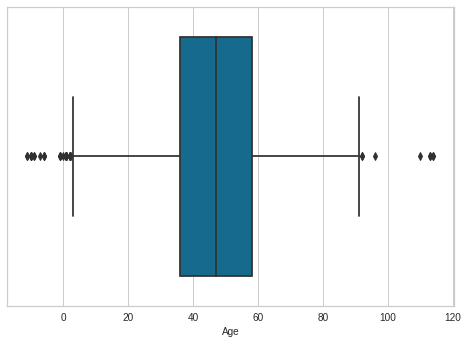

In [215]:
_ = sns.boxplot(data=ds, x="Age")

Taking a look to our older customer

In [216]:
ds.query("Age > 90")

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
3282,3283,PRT,114.0,1015,0xD38D7A36180C13A0574D7519E1494B8E2EAC72621A6D44017173DB812223B6BF,0xCF11B7A6F80F424EDB78D3FF8352233D36F6F511F9B63E90A69FDECF10970CA0,22,79.0,25.5,0,...,False,False,False,False,True,False,False,False,False,False
7424,7425,DEU,91.0,941,0x9BB885192EA1711E8E51BC3E2FF44CCB5EBE382ED46D71F344BF5806C52AD14A,0x41F169005ABE08C8337271287032C718F65879A628C389750158F28E4D2AC579,0,535.0,170.0,0,...,False,False,False,False,False,False,False,False,False,False
18910,18911,BEL,110.0,768,0x6152D1F1D09B9CC7D2FF30569EF3B1929722B4E6EA77483CD11300A84A04CC6A,0xE1C79C2BF9A49CDB7F3C309FDEE683B7C10DBBBFFFBC769BB814671913D4496D,215,140.0,164.8,0,...,False,False,False,False,False,False,False,False,False,False
19865,19866,PRT,92.0,749,0x7BE0709AAC6C0E41F0F4FBE84FAAE37B7BBE717FC0DD21A2ADB6A7A0E48B91AB,0xE1B62A869E6F1926DD4BAD5C29A5B65DDFCDCAF44BCCC89C54EECB56E787B56F,18,68.0,14.0,0,...,False,False,False,False,False,False,False,False,False,False
25587,25588,DEU,113.0,634,0x7288D12D383C94B2D140A2045711DD48205EF14F389D755763E10FEEA2AB4211,0x2907579A969DD1DD4BE224AB6B7D0F709AE9A38FBE696E9F74EDAF0EAB52D073,7,492.0,76.4,0,...,False,False,False,False,False,False,False,False,False,False
44518,44519,DEU,113.0,337,0x63FB7ADFA66ED7DC0ACC4CC82D0FF9F917A358514E4965FECB4FC9E6AC042D74,0x77C5E755CC76FED9DCAB1C593112EE2BEF92974D3699BA07CD31D137A0EAD235,7,234.0,34.5,0,...,False,False,False,False,True,False,False,False,False,False
45082,45083,PRT,114.0,330,0x4C59FE6EA7DE0C51431EF8B6F650717835FB094E00ABC1045E48D24979E957E8,0x32A503C87CCC773E24E3A9B6B1348A5CE6BF5866E0C6C48D7E12BF742525A1D4,2,266.0,43.0,0,...,False,False,False,False,True,False,False,False,False,False
62677,62678,NOR,96.0,177,0x50D3ABACF8477867E7B1ECADEF10CCCB42677B6C6BA455AC5F6969F96B169003,0xF0711CD1224E387B88663604CB8B2301DD7091FFA3A21AE70622FAE92DC58BC8,87,734.0,24.0,0,...,False,False,False,False,False,True,False,False,False,False
67345,67346,GBR,92.0,142,0xE564443CF2D1FB2F9B7A93F8AC13675B301B91CA031C9310526A5838F168800C,0x2010F56B5B8184AF0A36D772392FF771EFF486FA147C01499A9EF9896AB911FF,78,237.0,55.0,0,...,False,False,False,False,False,False,False,False,False,False


In [217]:
# Checking the number of registers with age lower than 0. Maybe separate them into group "minors"
ds[ds["Age"] < 18]["Age"].count()

954

Since there are 4412 observations, which is 5% of the data,we consider these observations to be children of the customers and leave them as they are, and remove only the ones below 0 as it is a mistake

In [218]:
# Removing the exrtreme values: lower than 0 and higher than 100
ds = ds[ds["Age"] > 0].copy()
ds["Age"] = np.where(ds["Age"] > 90, 90, ds["Age"])

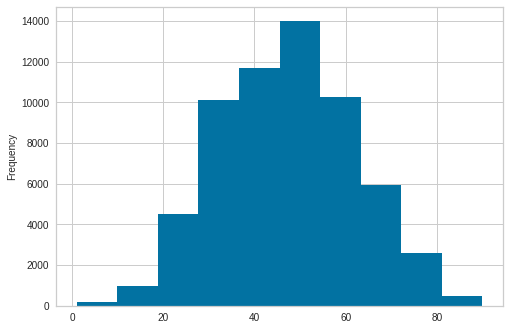

In [219]:
_ = ds["Age"].plot.hist(bins=10)

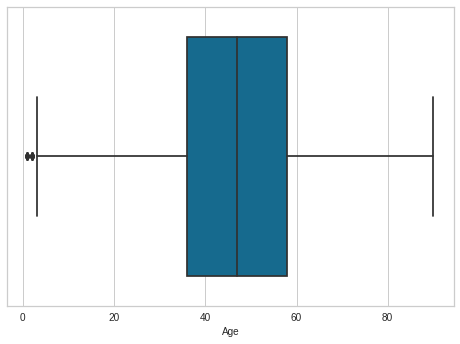

In [220]:
_ = sns.boxplot(data=ds, x="Age")

From the pie chart we can see that the first four nationality make 50% of the dataset, and the first 10 make around 75%. So we will try to put all the other nationalities on a new group in order to avoid course of dimensionality.

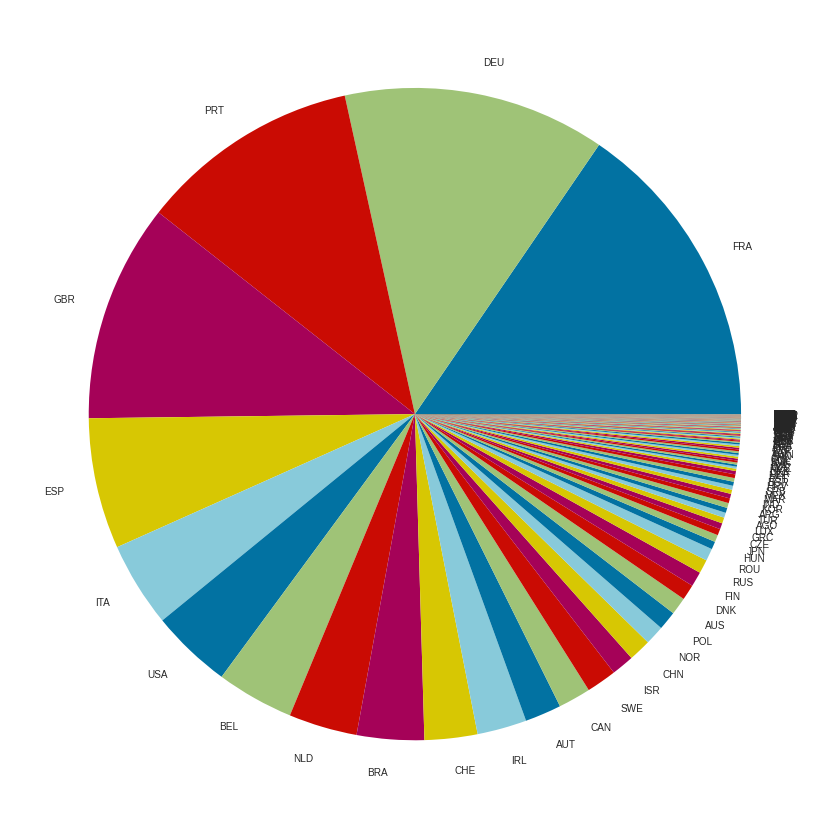

In [221]:
top_countries = (
    ds.groupby("Nationality")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False, ignore_index=True)
)

fig, ax = plt.subplots(figsize=(15, 15))
_ = ax.pie(top_countries["count"], labels=top_countries["Nationality"])

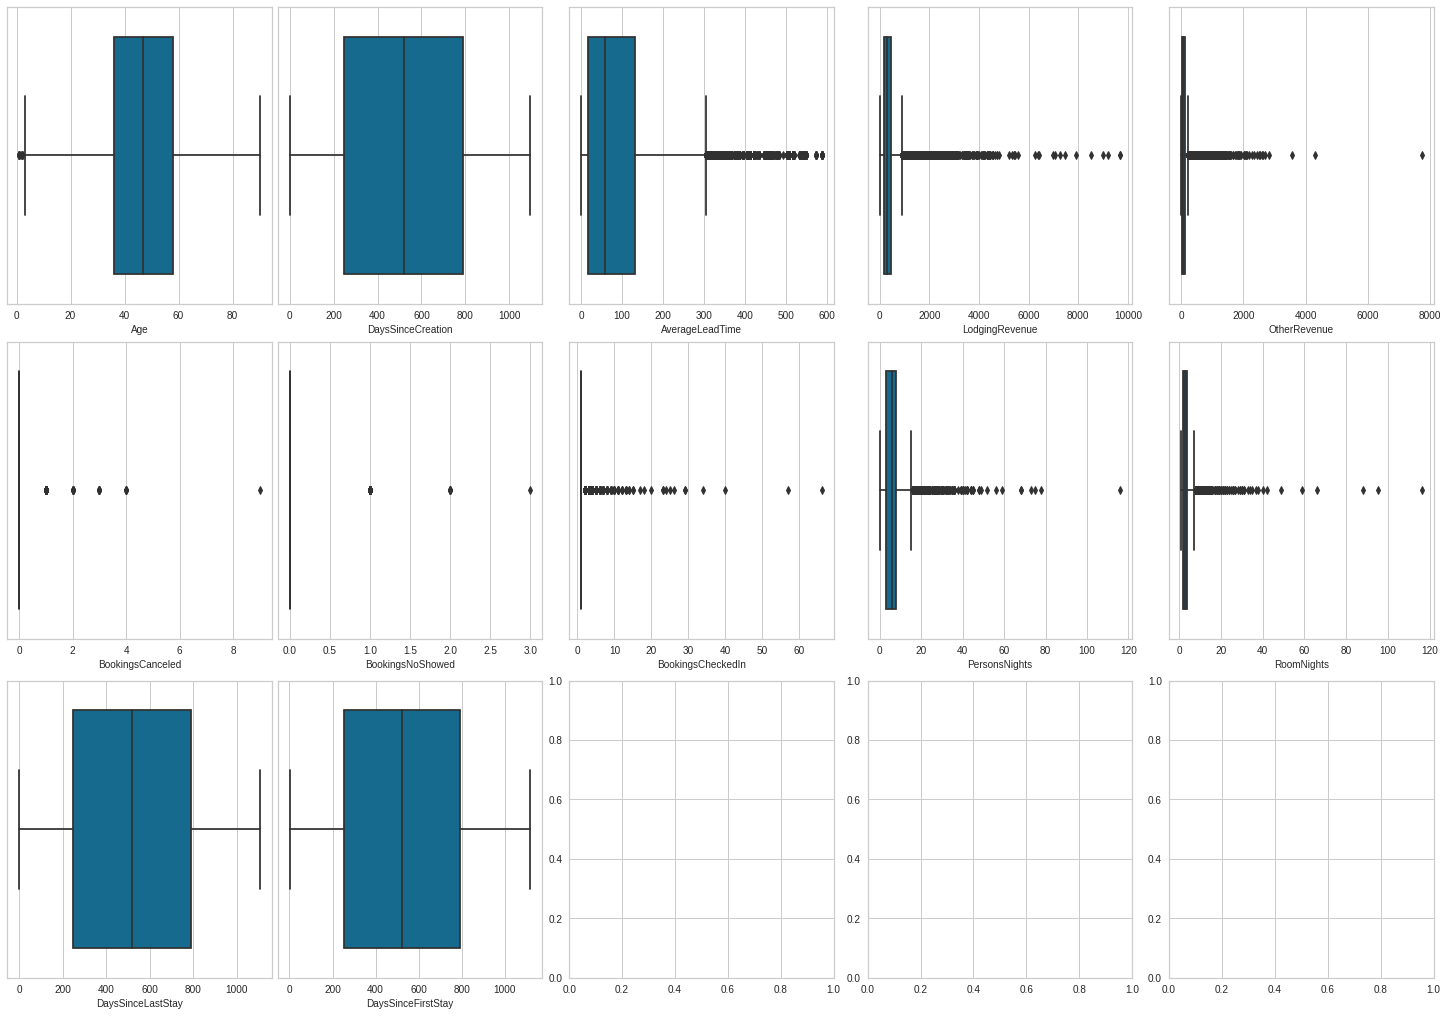

In [222]:
# Checking distribution of numerical variables
# how to separate bool?
numerical = ds.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(3, 5, figsize=(20, 14), constrained_layout=True)
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

## Feature engineering

**New features**
- TotalRevenue: LodgingRevenue + OtherRevenue.
- TotalRevenue/RoomNights: We this we can see how many do they spend for each night.
- LodgingRevenue/TotalRevenue: This will show how much do they have spent in percentage in the lodging compared with the total.
- OtherRevenue/TotalRevenue: This will show how much do they have spent in percentage in the lodging compared with the total.
- TotalBooking: Sum of BookingsCanceled, BookingsNoShowed, BookingsCheckedIn
- RatioBookingsCanceled: Show the behaviour of canceling bookings.
- RatioBookingsNoShowed: Show the behaviour of not showing up.
- RatioBookingsCheckedIn: Show the percentage of checked in booking, but we need to see if it will be a problem because of the correlation with the previous two.
- FreeStay: People that haven't spend on lodging, but have stayed in the hotel. So that the algorithm can know this behaviour.
- AveragePeopleRoom: How many people stayed on average in one room.
**We also considered to divide everything by persons, but we thought that is better to see how much the group spend, and to each individual**

These are the number of people effected by the transformation: 878


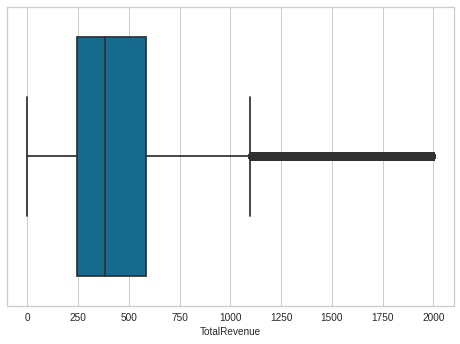

In [223]:
ds["TotalRevenue"] = ds["LodgingRevenue"] + ds["OtherRevenue"]
print(
    "These are the number of people effected by the transformation:",
    (ds["TotalRevenue"] > 2000).sum(),
)
ds["TotalRevenue"] = np.where(ds["TotalRevenue"] > 2000, 2000, ds["TotalRevenue"])
_ = sns.boxplot(data=ds, x="TotalRevenue")

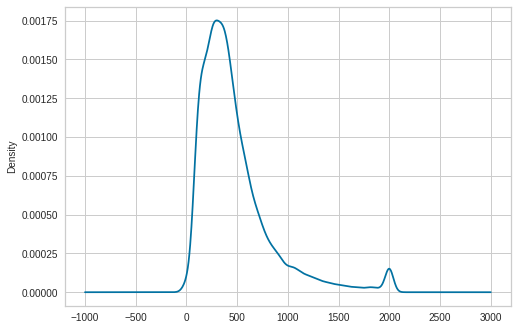

In [224]:
_ = ds["TotalRevenue"].plot.kde()

Beside dealing with outliers we also have to deal with division by zero that create null values, so we will change this value with a 0.

These are the number of people effected by the transformation: 805


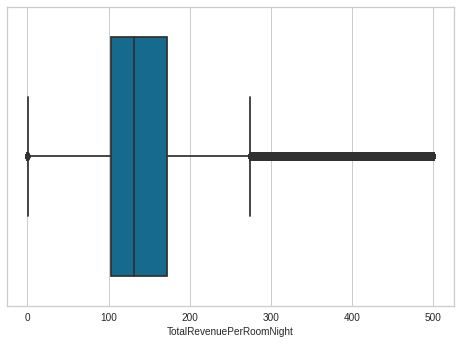

In [225]:
ds["TotalRevenuePerRoomNight"] = ds["TotalRevenue"] / ds["RoomNights"]
print(
    "These are the number of people effected by the transformation:",
    (ds["TotalRevenuePerRoomNight"] > 500).sum(),
)
ds["TotalRevenuePerRoomNight"] = np.where(
    ds["TotalRevenuePerRoomNight"] > 500, 500, ds["TotalRevenuePerRoomNight"]
)
ds["TotalRevenuePerRoomNight"] = np.where(
    ds["TotalRevenuePerRoomNight"].isnull(), 0, ds["TotalRevenuePerRoomNight"]
)
_ = sns.boxplot(data=ds, x="TotalRevenuePerRoomNight")

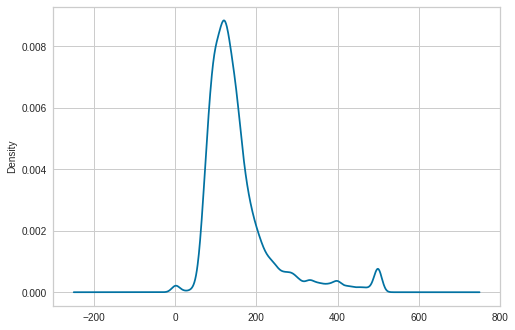

In [226]:
_ = ds["TotalRevenuePerRoomNight"].plot.kde()

These are the number of people effected by the transformation: 541


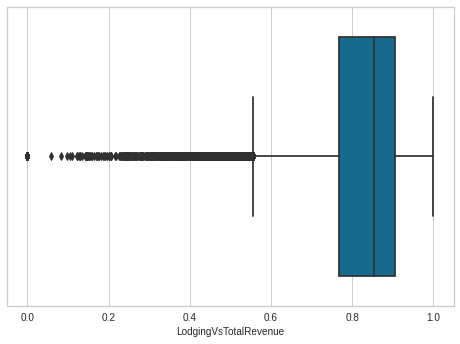

In [227]:
ds["LodgingVsTotalRevenue"] = ds["LodgingRevenue"] / ds["TotalRevenue"]
print(
    "These are the number of people effected by the transformation:",
    (ds["LodgingVsTotalRevenue"] > 1).sum(),
)
ds["LodgingVsTotalRevenue"] = np.where(
    ds["LodgingVsTotalRevenue"] > 1, 1, ds["LodgingVsTotalRevenue"]
)
ds["LodgingVsTotalRevenue"] = np.where(
    ds["LodgingVsTotalRevenue"].isnull(), 0, ds["LodgingVsTotalRevenue"]
)
_ = sns.boxplot(data=ds, x="LodgingVsTotalRevenue")

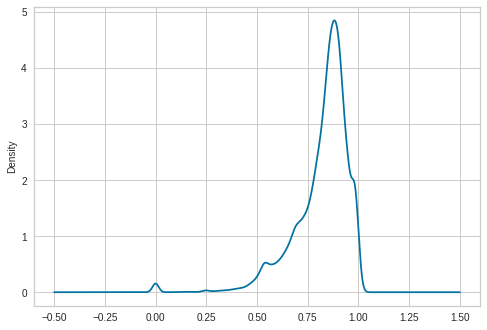

In [228]:
_ = ds["LodgingVsTotalRevenue"].plot.kde()

These are the number of people effected by the transformation: 19


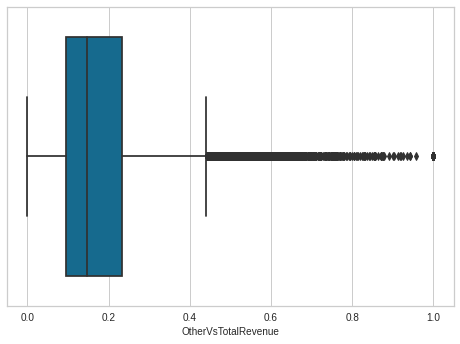

In [229]:
ds["OtherVsTotalRevenue"] = ds["OtherRevenue"] / ds["TotalRevenue"]
print(
    "These are the number of people effected by the transformation:",
    (ds["OtherVsTotalRevenue"] > 1).sum(),
)
ds["OtherVsTotalRevenue"] = np.where(
    ds["OtherVsTotalRevenue"] > 1, 1, ds["OtherVsTotalRevenue"]
)
ds["OtherVsTotalRevenue"] = np.where(
    ds["OtherVsTotalRevenue"].isnull(), 0, ds["OtherVsTotalRevenue"]
)
_ = sns.boxplot(data=ds, x="OtherVsTotalRevenue")

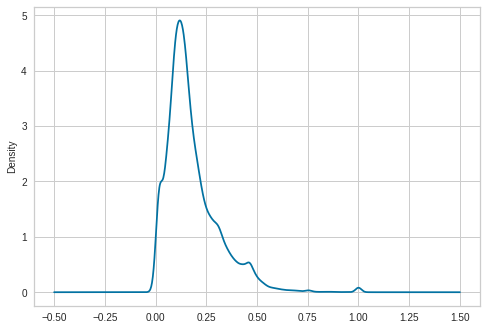

In [230]:
_ = ds["OtherVsTotalRevenue"].plot.kde()

These are the number of people effected by the transformation: 12


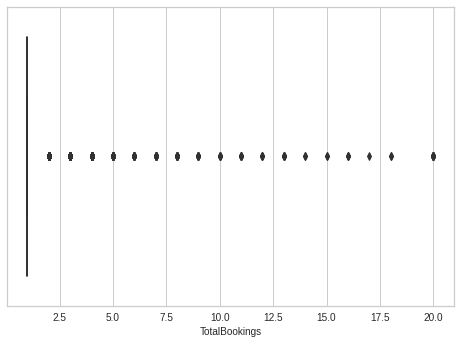

In [231]:
ds["TotalBookings"] = (
    ds["BookingsCanceled"] + ds["BookingsNoShowed"] + ds["BookingsCheckedIn"]
)
print(
    "These are the number of people effected by the transformation:",
    (ds["TotalBookings"] > 20).sum(),
)
ds["TotalBookings"] = np.where(ds["TotalBookings"] > 20, 20, ds["TotalBookings"])
_ = sns.boxplot(data=ds, x="TotalBookings")

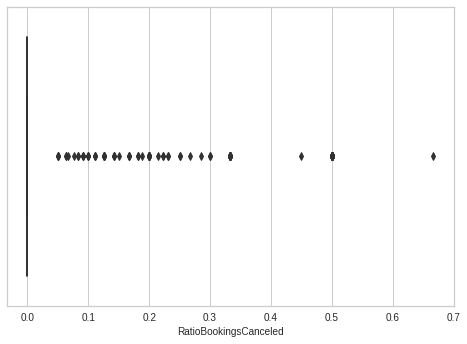

In [232]:
ds["RatioBookingsCanceled"] = ds["BookingsCanceled"] / ds["TotalBookings"]
ds["RatioBookingsCanceled"] = np.where(
    ds["RatioBookingsCanceled"].isnull(), 0, ds["RatioBookingsCanceled"]
)
_ = sns.boxplot(data=ds, x="RatioBookingsCanceled")

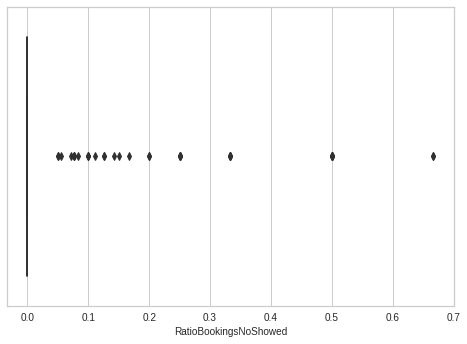

In [233]:
ds["RatioBookingsNoShowed"] = ds["BookingsNoShowed"] / ds["TotalBookings"]
ds["RatioBookingsNoShowed"] = np.where(
    ds["RatioBookingsNoShowed"].isnull(), 0, ds["RatioBookingsNoShowed"]
)
_ = sns.boxplot(data=ds, x="RatioBookingsNoShowed")

These are the number of people effected by the transformation: 11


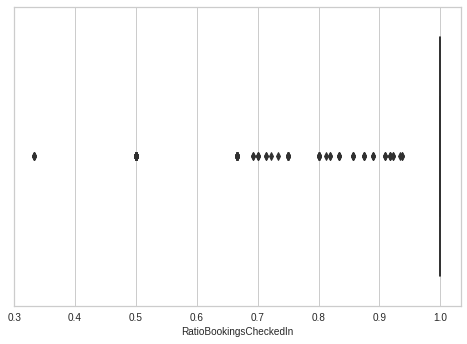

In [234]:
ds["RatioBookingsCheckedIn"] = ds["BookingsCheckedIn"] / ds["TotalBookings"]
print(
    "These are the number of people effected by the transformation:",
    (ds["RatioBookingsCheckedIn"] > 1).sum(),
)
ds["RatioBookingsCheckedIn"] = np.where(
    ds["RatioBookingsCheckedIn"] > 1, 1, ds["RatioBookingsCheckedIn"]
)
ds["RatioBookingsCheckedIn"] = np.where(
    ds["RatioBookingsCheckedIn"].isnull(), 0, ds["RatioBookingsCheckedIn"]
)
_ = sns.boxplot(data=ds, x="RatioBookingsCheckedIn")

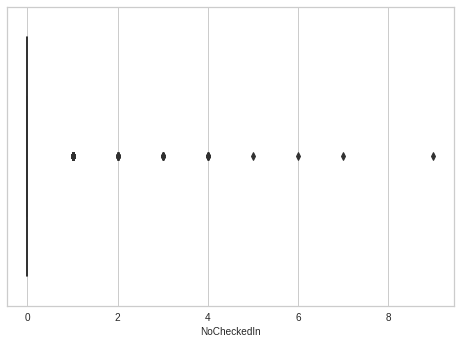

In [235]:
ds["NoCheckedIn"] = ds["BookingsNoShowed"] + ds["BookingsCanceled"]
_ = sns.boxplot(data=ds, x=ds["NoCheckedIn"])

In [236]:
print(
    "Number of people that canceled or didn't showed: ",
    ds.query("NoCheckedIn > 1").shape[0],
)  # Only 30 peoples didn't have done the checkin, we tried this feature but with such a low number of people wasn't working.

Number of people that canceled or didn't showed:  30


Some of the people have a lodgign reveneu of 0 and have done the check in, so we made a feature for them.

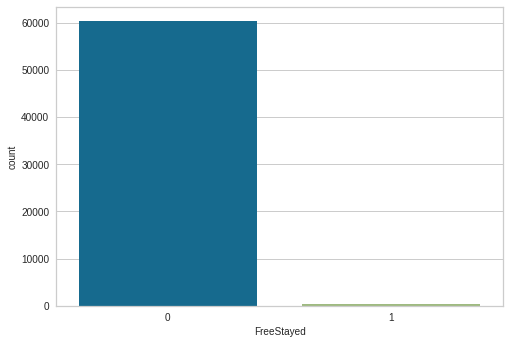

In [237]:
ds["FreeStayed"] = np.where(
    (ds["LodgingRevenue"] == 0) & (ds["BookingsCheckedIn"] > 0), 1, 0
)
_ = sns.countplot(x=ds["FreeStayed"])

In [238]:
print(
    "Number of people that stayed for free in the hotel: ",
    ds[ds["FreeStayed"] == 1].shape[0],
)

Number of people that stayed for free in the hotel:  360


These are the number of people effected by the transformation: 1013


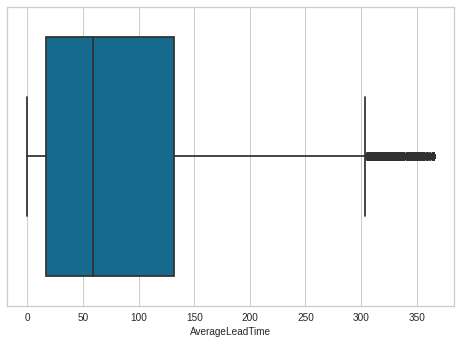

In [239]:
print(
    "These are the number of people effected by the transformation:",
    (ds["AverageLeadTime"] > 365).sum(),
)
ds["AverageLeadTime"] = np.where(
    ds["AverageLeadTime"] > 365, 365, ds["AverageLeadTime"]
)
_ = sns.boxplot(data=ds, x="AverageLeadTime")

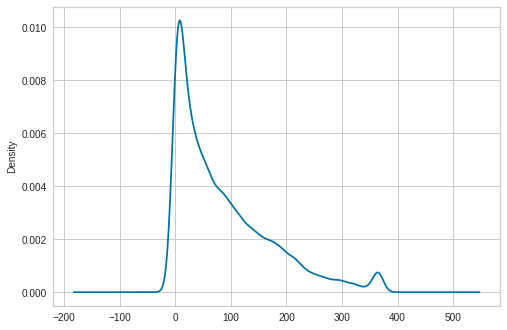

In [240]:
_ = ds["AverageLeadTime"].plot.kde()

These are the number of people effected by the transformation: 120


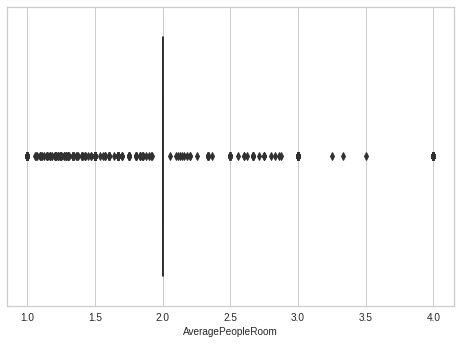

In [241]:
ds["AveragePeopleRoom"] = ds["PersonsNights"] / ds["RoomNights"]
print(
    "These are the number of people effected by the transformation:",
    (ds["AveragePeopleRoom"] < 1).sum() + (ds["AveragePeopleRoom"] > 4).sum(),
)
ds["AveragePeopleRoom"] = np.where(
    ds["AveragePeopleRoom"] < 1, 1, ds["AveragePeopleRoom"]
)
ds["AveragePeopleRoom"] = np.where(
    ds["AveragePeopleRoom"] > 4, 4, ds["AveragePeopleRoom"]
)
_ = sns.boxplot(data=ds, x="AveragePeopleRoom")

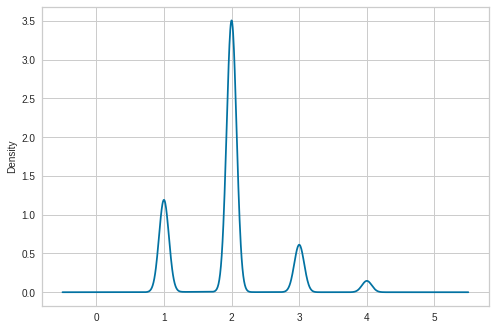

In [242]:
_ = ds["AveragePeopleRoom"].plot.kde()

Here we have the problem of having too many cateogories, so is better to group them in a way that the one that are more similar stay togheter. Like all the requests about the floor.

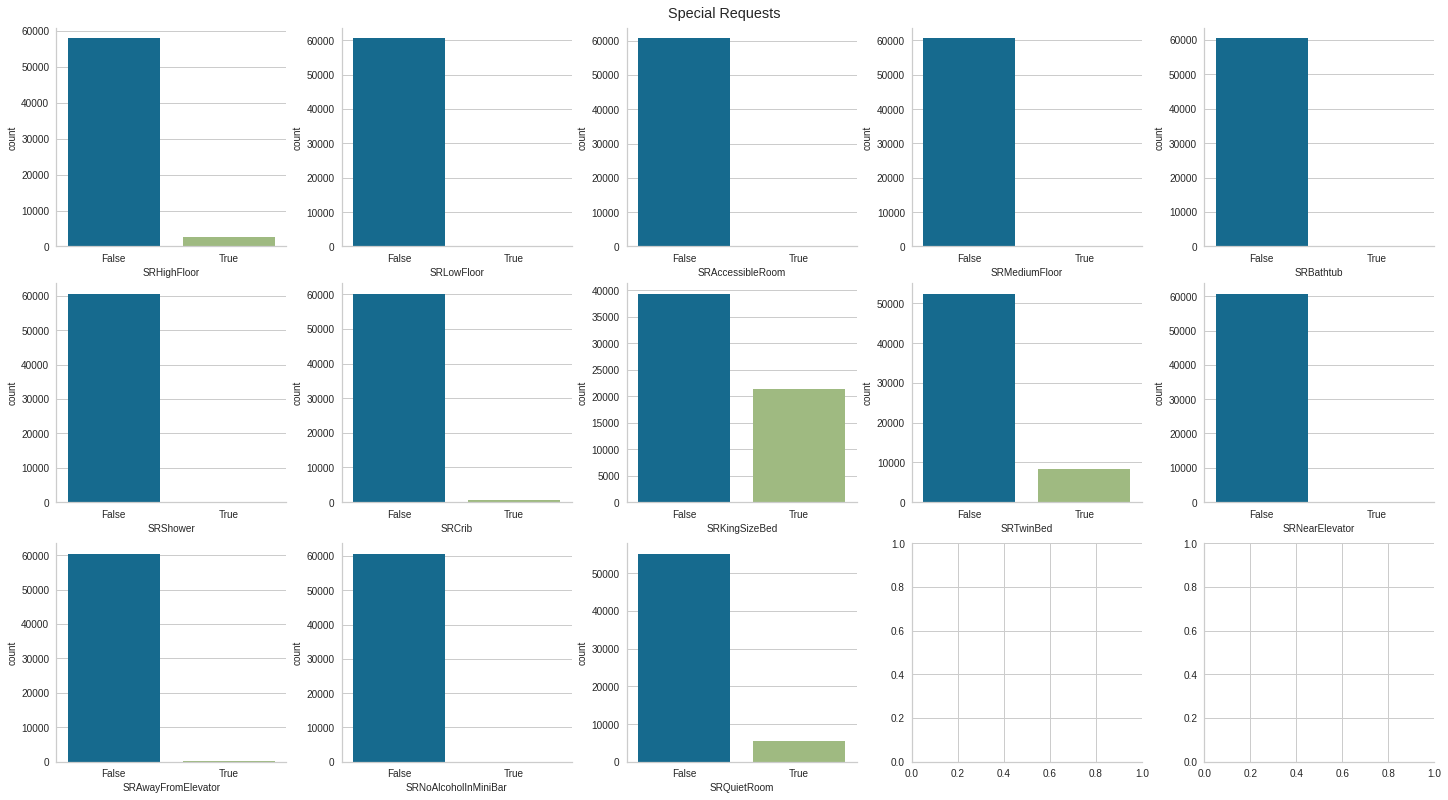

In [243]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(
    3, 5, figsize=(20, 11), constrained_layout=True
)  # Added constrained_layout to avoid overlapping
for var, subplot in zip(
    ds[
        [
            "SRHighFloor",
            "SRLowFloor",
            "SRAccessibleRoom",
            "SRMediumFloor",
            "SRBathtub",
            "SRShower",
            "SRCrib",
            "SRKingSizeBed",
            "SRTwinBed",
            "SRNearElevator",
            "SRAwayFromElevator",
            "SRNoAlcoholInMiniBar",
            "SRQuietRoom",
        ]
    ],
    ax.flatten(),
):
    g = sns.countplot(x=var, data=ds, ax=subplot)

# Decoration
sns.despine()
plt.rc("axes")
fig.suptitle("Special Requests");

In [244]:
ds["SRRoomPosition"] = ds[
    [
        "SRHighFloor",
        "SRLowFloor",
        "SRAccessibleRoom",
        "SRMediumFloor",
        "SRNearElevator",
        "SRAwayFromElevator",
        "SRQuietRoom",
    ]
].apply(lambda row: any(row), axis=1)

In [245]:
ds["SRBed"] = ds[["SRKingSizeBed", "SRTwinBed"]].apply(lambda row: any(row), axis=1)

In [246]:
ds["SRChild"] = ds[["SRCrib", "SRNoAlcoholInMiniBar"]].apply(
    lambda row: any(row), axis=1
)

In [247]:
ds["SRBath"] = ds[["SRBathtub", "SRShower",]].apply(lambda row: any(row), axis=1)

Let's see how many special request do we have.

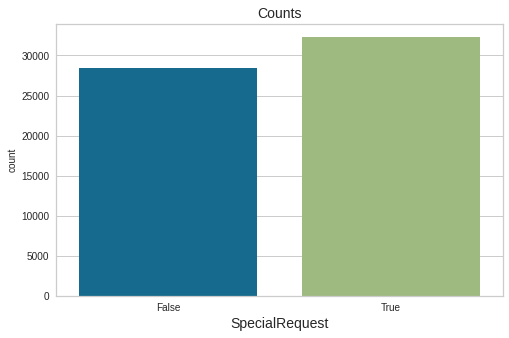

In [248]:
# Create a new boolean variable "SpecialRequest"
ds["SpecialRequest"] = ds[
    [
        "SRHighFloor",
        "SRLowFloor",
        "SRAccessibleRoom",
        "SRMediumFloor",
        "SRBathtub",
        "SRShower",
        "SRCrib",
        "SRKingSizeBed",
        "SRTwinBed",
        "SRNearElevator",
        "SRAwayFromElevator",
        "SRNoAlcoholInMiniBar",
        "SRQuietRoom",
    ]
].apply(lambda row: any(row), axis=1)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = sns.countplot(x="SpecialRequest", data=ds)
_ = plt.xlabel("SpecialRequest", fontsize=14)
_ = plt.title("Counts", fontsize=14)

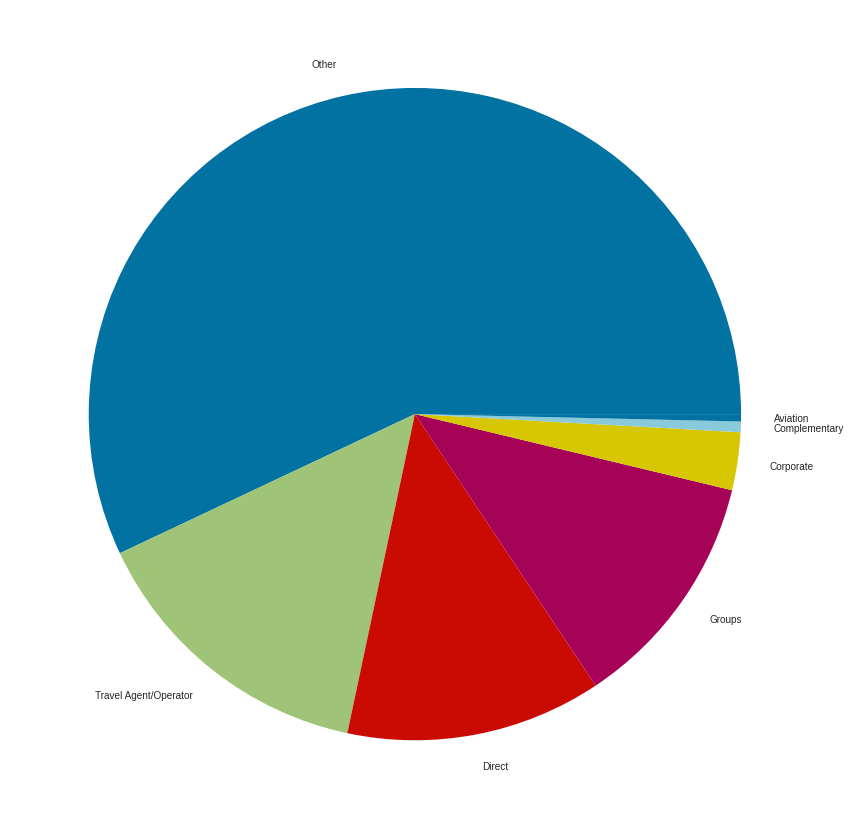

In [249]:
segments = (
    ds.groupby("MarketSegment")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False, ignore_index=True)
)

fig, ax = plt.subplots(figsize=(15, 15))
_ = ax.pie(segments["count"], labels=segments["MarketSegment"])

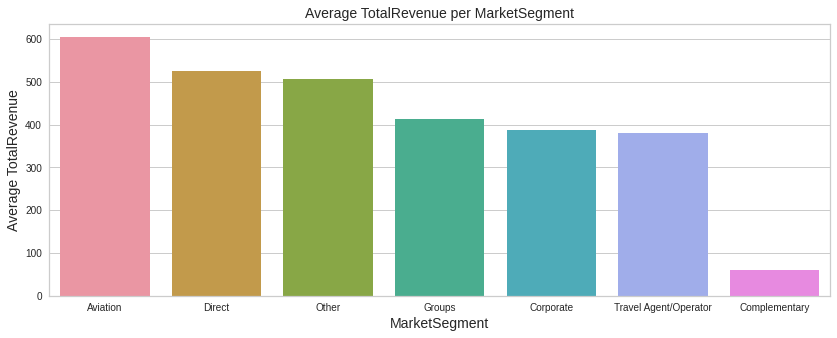

In [250]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(
    x="MarketSegment",
    y="TotalRevenue",
    data=ds.groupby("MarketSegment")["TotalRevenue"].mean().reset_index(),
    order=[
        "Aviation",
        "Direct",
        "Other",
        "Groups",
        "Corporate",
        "Travel Agent/Operator",
        "Complementary",
    ],
)
plt.xlabel("MarketSegment", fontsize=14)
plt.ylabel("Average TotalRevenue", fontsize=14)
plt.title("Average TotalRevenue per MarketSegment", fontsize=14)

plt.show()

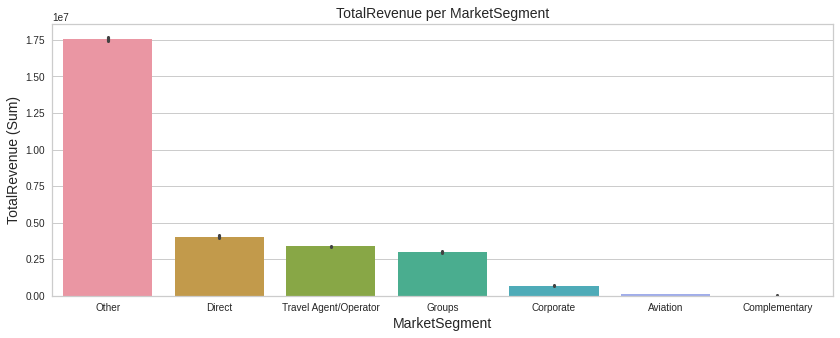

In [251]:
# LodgingRevenue per current market segments
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(
    x="MarketSegment",
    y="TotalRevenue",
    data=ds,
    estimator=sum,
    order=[
        "Other",
        "Direct",
        "Travel Agent/Operator",
        "Groups",
        "Corporate",
        "Aviation",
        "Complementary",
    ],
)
plt.xlabel("MarketSegment", fontsize=14)
plt.ylabel("TotalRevenue (Sum)", fontsize=14)
plt.title("TotalRevenue per MarketSegment", fontsize=14)

plt.show()

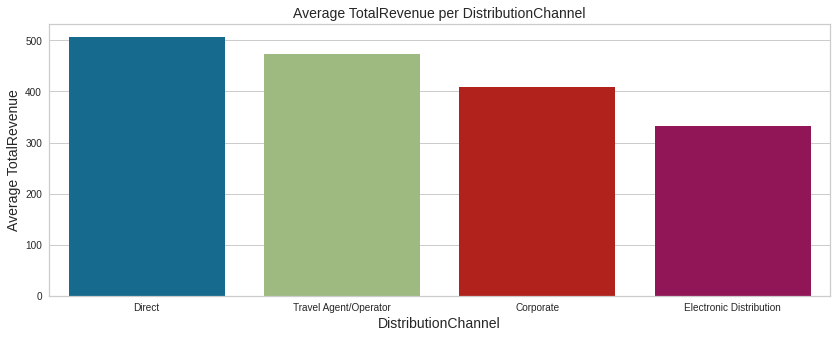

In [252]:
# Calculate the average TotalRevenue per DistributionChannel
avg_revenue = ds.groupby("DistributionChannel")["TotalRevenue"].mean().reset_index()

# Plot the sorted data
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(
    x="DistributionChannel",
    y="TotalRevenue",
    data=avg_revenue,
    order=["Direct", "Travel Agent/Operator", "Corporate", "Electronic Distribution"],
)
plt.xlabel("DistributionChannel", fontsize=14)
plt.ylabel("Average TotalRevenue", fontsize=14)
plt.title("Average TotalRevenue per DistributionChannel", fontsize=14)

plt.show()

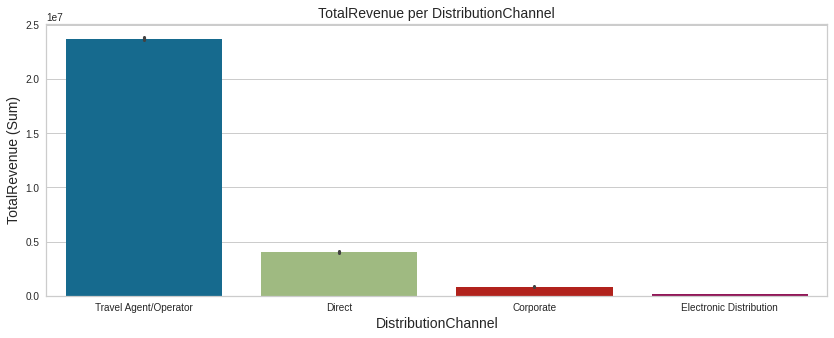

In [253]:
# LodgingRevenue per current market segments
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(
    x="DistributionChannel",
    y="TotalRevenue",
    data=ds,
    estimator=sum,
    order=["Travel Agent/Operator", "Direct", "Corporate", "Electronic Distribution"],
)
plt.xlabel("DistributionChannel", fontsize=14)
plt.ylabel("TotalRevenue (Sum)", fontsize=14)
plt.title("TotalRevenue per DistributionChannel", fontsize=14)

plt.show()

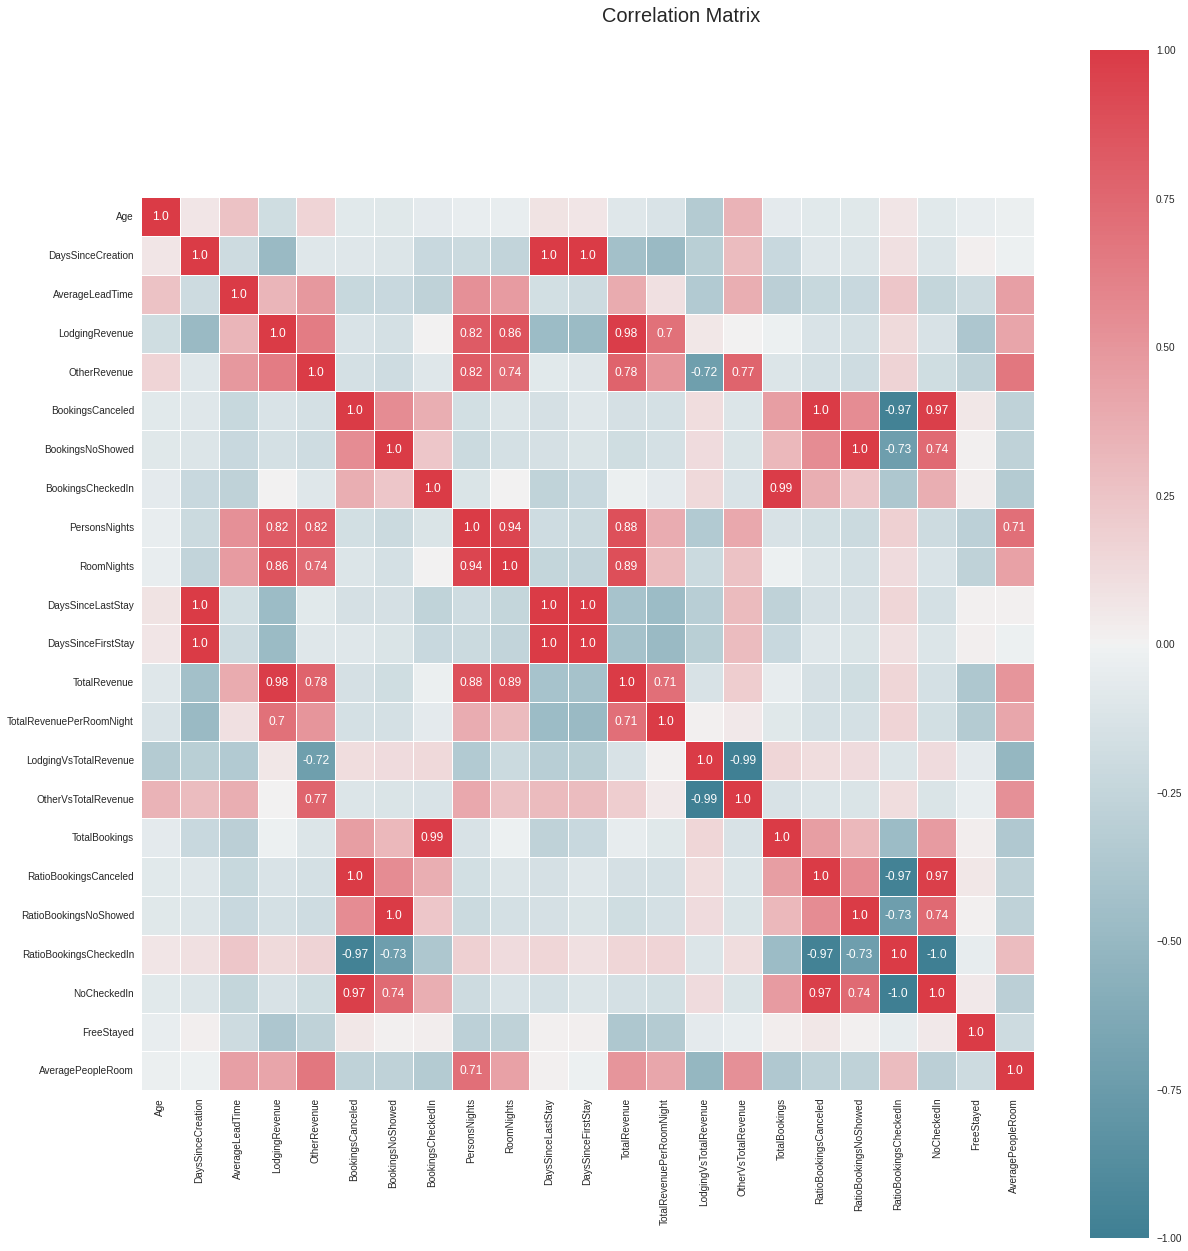

In [254]:
# Prepare figure
fig = plt.figure(figsize=(20, 20))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(
    ds[ds.select_dtypes(include=[np.number]).columns.tolist()]
    .corr(method="spearman")
    .corr(method="pearson"),
    decimals=2,
)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.70
annot = np.where(
    mask_annot, corr.values, np.full(corr.shape, "")
)  # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(
    data=corr,
    annot=annot,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    fmt="s",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

Observations
- PersonsNights and RoomNights are highly correlated, most of them have 2 people per room.
- The variables "DaysSinceLastStay" and "DaysSinceFirstStay" are extremelly high correlated for 2 reasons:
 - 1. The majority of clients (74%) have checked in only once, and in those cases the information in both columns will be equal because the day since their last stay is equal to their first stay. 
 - 2. 24% of the clients never checked in and have their bookings planned for future dates, in those cases the the values of the 2 columns are equal to 0.

In [255]:
# We need to change the index because otherwise the onehotencoder will put null values on all the indexex of dropped rows
ds.reset_index(drop=True, inplace=True)

# Clustering

In [256]:
# Packages
import collections

import category_encoders as ce
import joypy
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
from yellowbrick.cluster import (
    InterclusterDistance,
    KElbowVisualizer,
    SilhouetteVisualizer,
)

**What we removed**
- All the id field, they are not needed.
- All the variable that we used to create the derived variables since we already have the new ones.
- The market segment since we are creating new ones.
- Age because we saw that all the centroids have the same age.
- The ratios about lodings and other revenue since the centroids have nearly the same values.
- And the ratios of the checkin because we have too few people that canceled or not showed after having removed the customer that never stayed at the hotel.
- DaySinceLastStay, DaysSinceFirstStay and DaysSinceCreation, they are all highly correlated we choose one of them but by the profiling we saw that they were not driscriminating.
- AveragePeopleRoom, wasn't discriminating.

In [257]:
# Create a modeling dataset from the original dataset
X = ds[
    [
        "PersonsNights",
        "RoomNights",
        "DistributionChannel",
        "TotalRevenue",
        "TotalRevenuePerRoomNight",
        "TotalBookings",
        "FreeStayed",
        "SRRoomPosition",
        "SRBed",
        "SRChild",
        "SRBath",
    ]
].copy(deep=True)

In [258]:
# Create a copy of the DataFrame to avoid modifying the original data
X_encoded = X.copy()

# Select the categorical columns
categorical_cols = ["DistributionChannel"]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

# Apply one-hot encoding to the categorical columns
encoded_cols = pd.DataFrame(encoder.fit_transform(X_encoded[categorical_cols]))

# Generate new column names for the encoded columns
encoded_cols.columns = encoder.get_feature_names(categorical_cols)

# Drop the original categorical columns from X_encoded
X_encoded = X_encoded.drop(categorical_cols, axis=1)

# Concatenate the encoded columns with X_encoded
X_encoded = pd.concat([X_encoded, encoded_cols], axis=1)

/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [259]:
X_encoded.head()

,PersonsNights,RoomNights,TotalRevenue,TotalRevenuePerRoomNight,TotalBookings,FreeStayed,SRRoomPosition,SRBed,SRChild,SRBath,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator
0,8,5,476.3,95.26,4,0,False,False,False,False,1.0,0.0,0.0,0.0
1,10,5,300.0,60.00,1,0,False,False,False,False,0.0,0.0,0.0,1.0
2,4,2,254.0,127.00,1,0,False,False,False,False,0.0,0.0,0.0,1.0
3,10,5,629.0,125.80,1,0,False,True,False,False,0.0,0.0,0.0,1.0
4,6,3,243.0,81.00,1,0,False,False,False,False,0.0,0.0,0.0,1.0


In [260]:
# Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
X_encoded = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(X_encoded.values),
    columns=X_encoded.columns,
    index=X_encoded.index,
)

In [261]:
# Check dataframe structure and statistics after all transformations
print(X_encoded.shape)
X_encoded.describe(include="all").T

(60709, 14)


,count,mean,std,min,25%,50%,75%,max
PersonsNights,60709.0,0.053229,0.037125,0.0,0.025862,0.051724,0.068966,1.0
RoomNights,60709.0,0.018459,0.017420,0.0,0.008696,0.017391,0.026087,1.0
TotalRevenue,60709.0,0.237188,0.182044,0.0,0.121000,0.191000,0.291700,1.0
TotalRevenuePerRoomNight,60709.0,0.309755,0.171450,0.0,0.206000,0.263667,0.342600,1.0
TotalBookings,60709.0,0.002201,0.024888,0.0,0.000000,0.000000,0.000000,1.0
FreeStayed,60709.0,0.005930,0.076778,0.0,0.000000,0.000000,0.000000,1.0
SRRoomPosition,60709.0,0.131743,0.338214,0.0,0.000000,0.000000,0.000000,1.0
SRBed,60709.0,0.486386,0.499819,0.0,0.000000,0.000000,1.000000,1.0
SRChild,60709.0,0.009603,0.097525,0.0,0.000000,0.000000,0.000000,1.0
SRBath,60709.0,0.004563,0.067394,0.0,0.000000,0.000000,0.000000,1.0


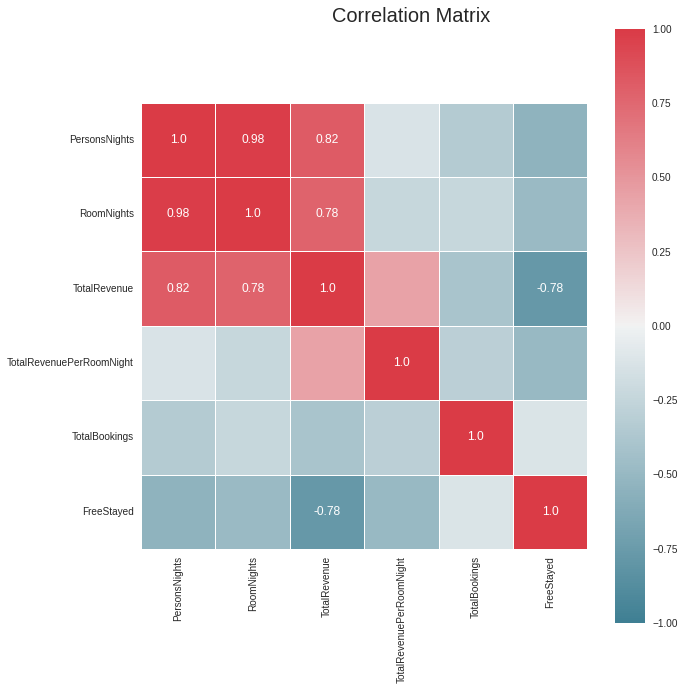

In [263]:
# Prepare figure
fig = plt.figure(figsize=(10, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(
    X[X.select_dtypes(include=[np.number]).columns.tolist()]
    .corr(method="spearman")
    .corr(method="pearson"),
    decimals=2,
)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.70
annot = np.where(
    mask_annot, corr.values, np.full(corr.shape, "")
)  # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(
    data=corr,
    annot=annot,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    fmt="s",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

### Analyze Principal Components

(60709, 2)


/tmp/ipykernel_4200/1756571401.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


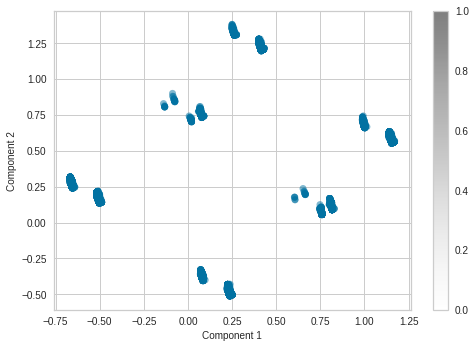

In [264]:
# Let's use PCA to visualize with only two components
pca2 = PCA(n_components=2)
pca2.fit(X_encoded)
X_pca2 = pca2.transform(X_encoded)
print(X_pca2.shape)

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], edgecolor="none", alpha=0.5, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar();

In [265]:
# Fit the PCA algorithm to data
pca = PCA().fit(X_encoded)

# Show the variance per component
pcaevr = ["{:f}".format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame(
    {
        "Component": range(1, len(X_encoded.columns) + 1),
        "Variance explained": pcaevr,
        "Cumulative variance explained": np.cumsum(pca.explained_variance_ratio_),
    }
)
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.401825,0.401825
1,2,0.262001,0.663827
2,3,0.146824,0.810650
3,4,0.069618,0.880268
4,5,0.062317,0.942586
5,6,0.016327,0.958913
6,7,0.013292,0.972205
7,8,0.012670,0.984874
8,9,0.007578,0.992453
9,10,0.006033,0.998485


Text(0.5, 1.0, 'Explained variance by components')

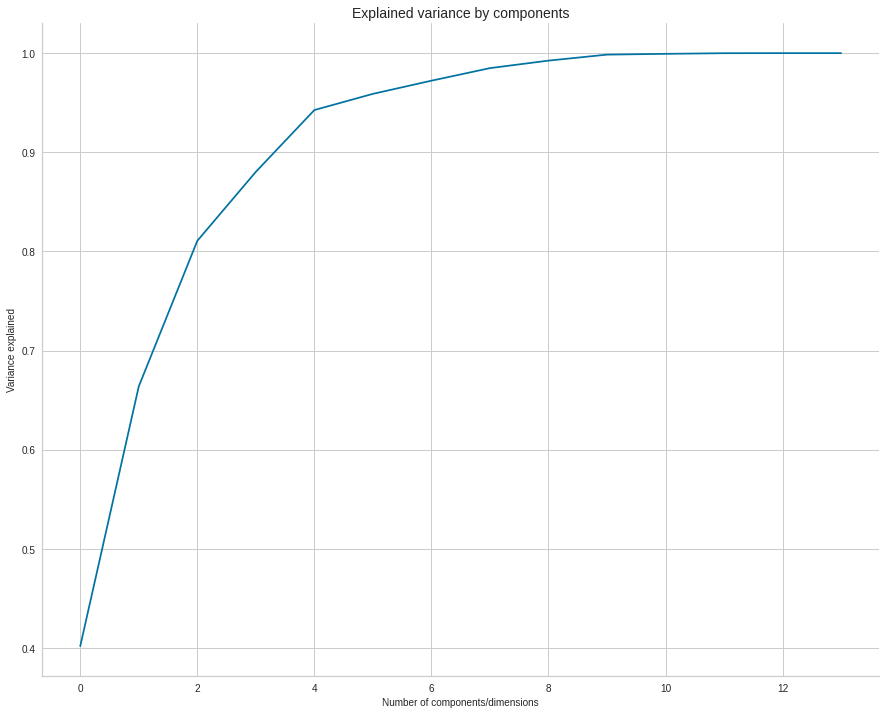

In [266]:
# Plot the cumulative explained variance

# Draw
fig, ax = plt.subplots(figsize=(15, 12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel("Number of components/dimensions")
plt.ylabel("Variance explained")
plt.rc("axes", labelsize=subPlots_label_fontSize)
plt.title("Explained variance by components", fontsize=plots_Title_fontSize)

## Modeling - K-Means - 15 Components
For information about K-Means and other clustering algoritms available in Scikit-learn check https://scikit-learn.org/stable/modules/clustering.html

In [267]:
# Apply the dimension reduction to the dataset (for 15 components)
pca_reduced = PCA(n_components=0.95)
pca_reduced.fit(X_encoded)
X_pca_reduced = pca_reduced.transform(X_encoded)
print(X_pca_reduced.shape)

(60709, 6)


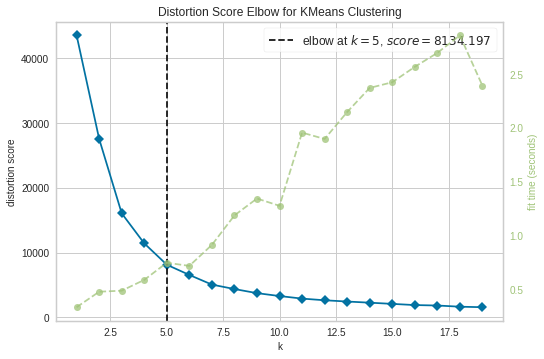

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [268]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1, 20), random_state=123)
visualizer.fit(X_pca_reduced)
visualizer.show()

100%|██████████| 18/18 [19:15<00:00, 64.20s/it]


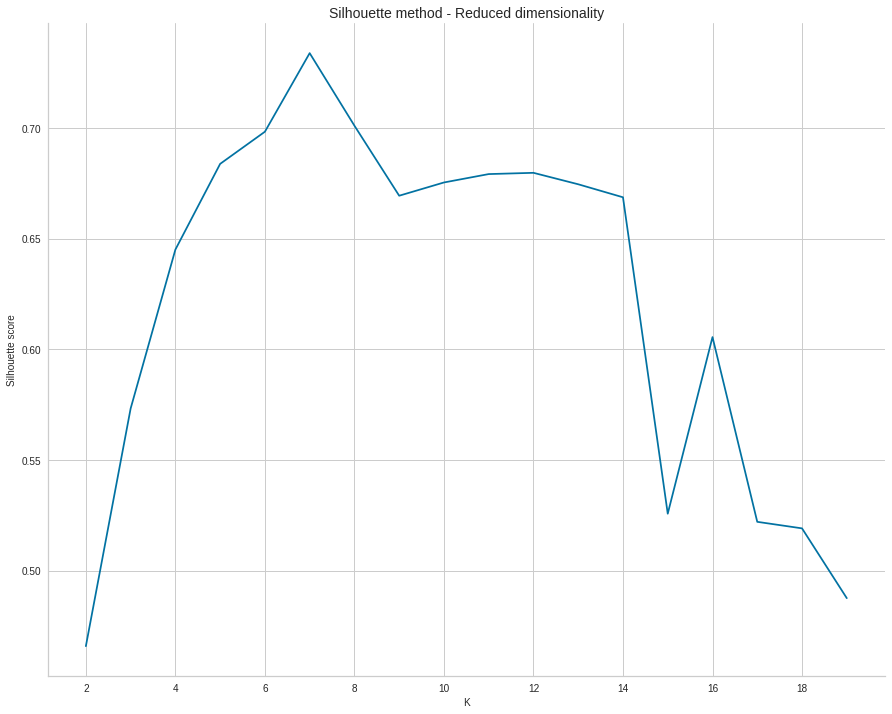

In [131]:
# Select K based on the Silhouette method
# ATTENTION! Depending on the computer this can take long time to run (more than 10 minutes)
sil = []

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in tqdm(range(2, 20)):
    km = KMeans(n_clusters=k, random_state=123).fit(X_pca_reduced)
    labels = km.labels_
    sil.append(silhouette_score(X_pca_reduced, labels, metric="euclidean"))


# Show Results
# Draw
fig, ax = plt.subplots(figsize=(15, 12))
plt.plot(range(2, 20), sil, "bx-")
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.rc("axes", labelsize=subPlots_label_fontSize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title("Silhouette method - Reduced dimensionality", fontsize=plots_Title_fontSize);

In [269]:
# Apply the K-Means for K=6
K = 7
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

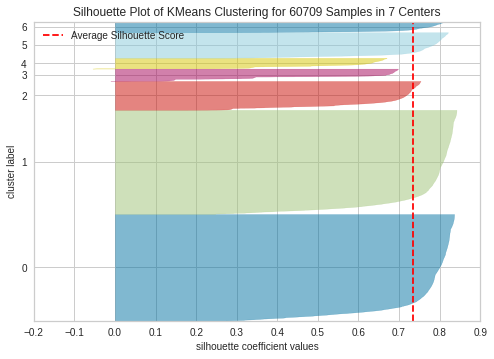

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 60709 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [270]:
# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
visualizer.fit(X_pca_reduced)
visualizer.show()

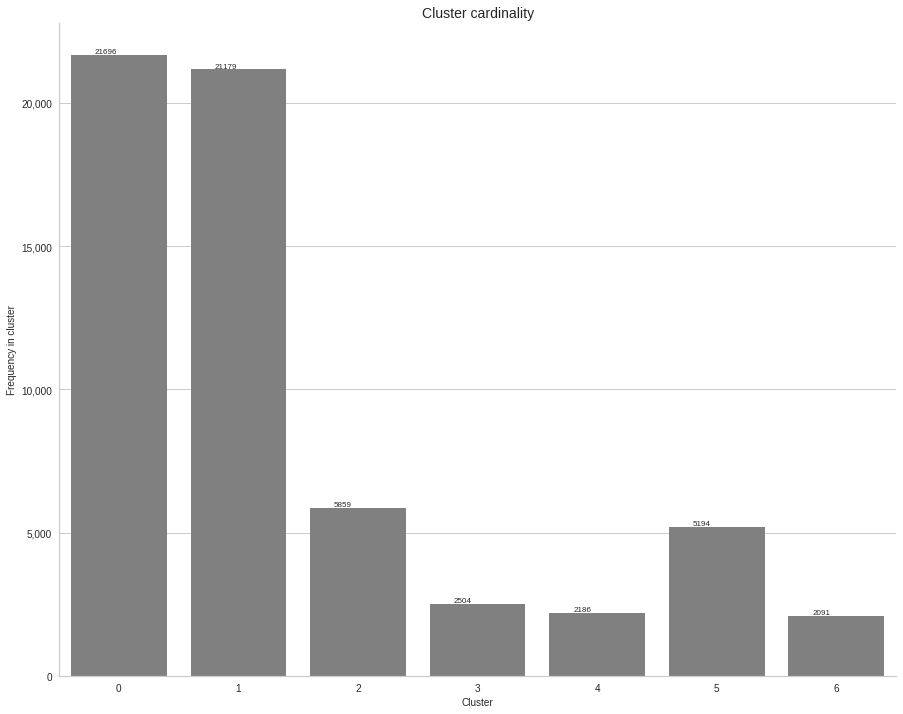

In [271]:
# Plot clusters cardinality

# Count observations per cluster
freqByCluster = X_encoded.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(15, 12))
g = sns.countplot(x=y_kmeans, color="grey")

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index, data in enumerate(freqByCluster):
    plt.text(
        x=index - 0.2,
        y=data + 50,
        s=f"{data}",
        fontdict=dict(fontsize=plots_barTexts_fontSize),
    )
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc("axes", labelsize=subPlots_label_fontSize)

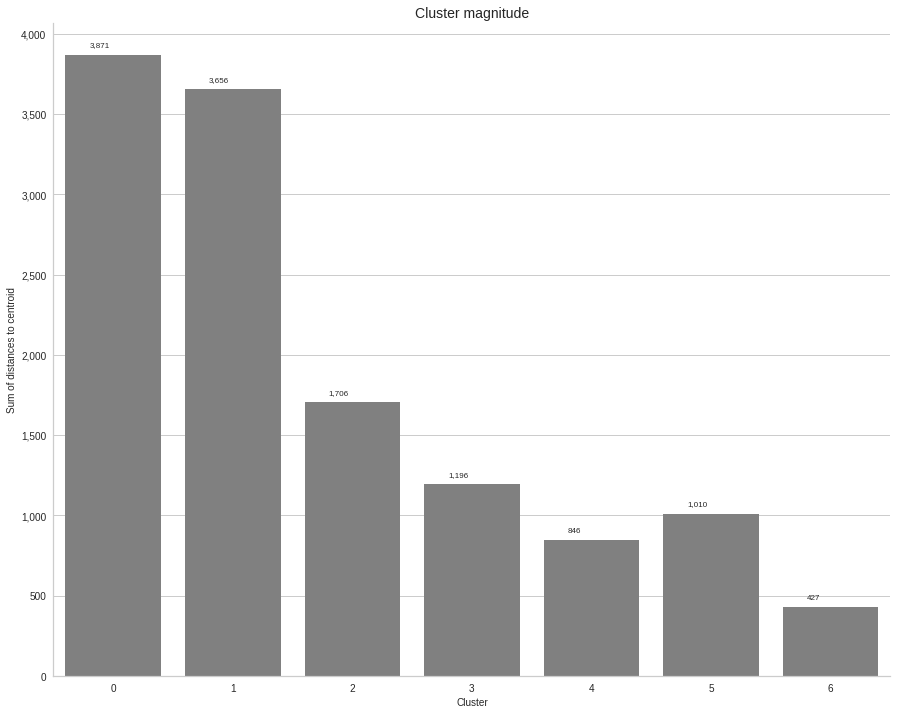

In [272]:
# Plot clusters magnitude

# Compute Magnitude
X_encoded["distanceToCentroid"] = np.min(allDistances, axis=1)
magnitude = X_encoded["distanceToCentroid"].groupby(y_kmeans).sum()
X_encoded = X_encoded.drop(columns=["distanceToCentroid"])

# Draw
fig, ax = plt.subplots(figsize=(15, 12))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color="grey")

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index, data in enumerate(magnitude):
    plt.text(
        x=index - 0.2,
        y=data + 50,
        s=f"{data:,.0f}",
        fontdict=dict(fontsize=plots_barTexts_fontSize),
    )
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc("axes", labelsize=subPlots_label_fontSize)

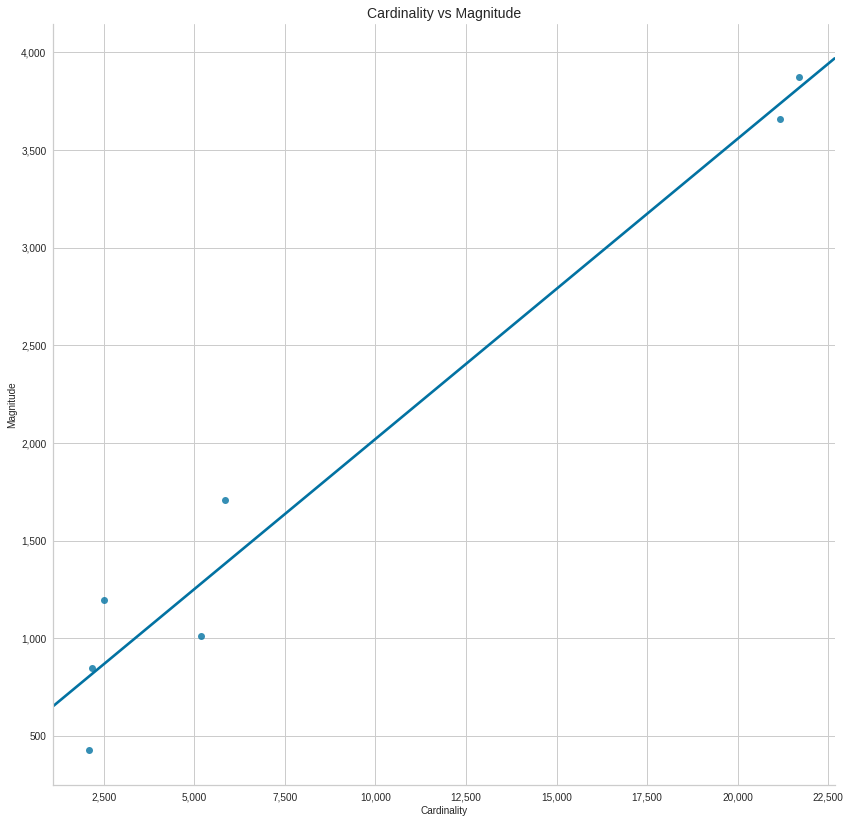

In [273]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(14, 14))
g = sns.regplot(
    x=freqByCluster, y=magnitude, scatter=True, seed=123, truncate=False, ci=None
)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc("axes", labelsize=subPlots_label_fontSize)

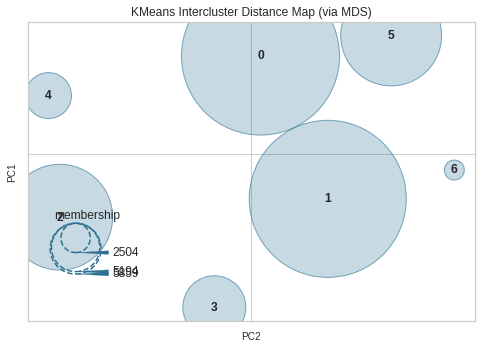

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [274]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca_reduced)
visualizer.show()

In [275]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_, columns=X_encoded.columns)
wheightsDF

,PersonsNights,RoomNights,TotalRevenue,TotalRevenuePerRoomNight,TotalBookings,FreeStayed,SRRoomPosition,SRBed,SRChild,SRBath,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator
0,-6.357246e-03,-1.661883e-03,-1.321508e-02,-5.333132e-04,1.543259e-03,1.123665e-02,-1.521855e-01,-7.390147e-01,4.525191e-03,-7.801551e-04,0.074871,0.412317,0.017215,-0.504403
1,2.754367e-03,1.127169e-04,3.668771e-02,4.811406e-02,4.533463e-03,1.267290e-02,1.028714e-01,6.455537e-01,7.938364e-03,7.793350e-03,0.042935,0.507426,0.005828,-0.556189
2,7.917462e-03,2.802817e-03,7.499394e-02,6.039368e-02,-9.039671e-04,-5.194085e-03,9.761509e-01,-1.878895e-01,1.436150e-03,6.736092e-03,-0.033961,0.035217,-0.003397,0.002141
3,-5.974987e-02,-1.893953e-02,-6.160597e-01,-5.644771e-01,5.044572e-03,3.484726e-02,1.147590e-01,4.018680e-02,-1.533761e-02,-3.072441e-03,0.418621,-0.244891,0.038299,-0.212029
4,2.482541e-02,1.659508e-02,4.039001e-01,3.442771e-01,2.362166e-02,-3.989940e-02,-1.102314e-02,1.044698e-02,-6.960736e-03,-4.521929e-03,0.667851,-0.434827,0.045887,-0.278911
5,2.363414e-01,1.211148e-01,6.183214e-01,-7.137438e-01,4.445712e-02,7.267612e-02,-6.583420e-03,-8.547905e-04,2.607082e-03,3.070669e-02,0.050180,0.060144,-0.148031,0.037707
6,3.103597e-02,1.993266e-02,1.170921e-01,-1.198032e-01,6.821604e-04,-1.229565e-02,5.286214e-04,7.423573e-03,-1.380749e-01,-4.369991e-05,-0.340219,-0.255517,0.842302,-0.246566
7,1.400023e-02,2.123378e-03,4.589169e-03,-1.760849e-02,7.424975e-04,2.054157e-02,1.265777e-04,4.261103e-05,9.896843e-01,2.116217e-02,-0.036812,-0.049522,0.119288,-0.032954
8,-2.914520e-02,-1.350433e-02,-1.530618e-03,8.090877e-02,5.163130e-03,9.946548e-01,1.791534e-03,-1.505191e-03,-2.122068e-02,-3.943573e-02,0.003033,-0.025826,0.018739,0.004054
9,-6.985917e-03,-3.155000e-03,-2.039878e-02,2.479194e-02,-5.473212e-03,3.655731e-02,-6.936731e-03,-4.207220e-03,-2.206881e-02,9.984454e-01,0.003710,-0.008475,0.003118,0.001648


In [276]:
# Study the weights of component 15
comp = abs(wheightsDF.iloc[0])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

SRBed                                          0.739015
DistributionChannel_Travel Agent/Operator      0.504403
DistributionChannel_Direct                     0.412317
SRRoomPosition                                 0.152185
DistributionChannel_Corporate                  0.074871
DistributionChannel_Electronic Distribution    0.017215
TotalRevenue                                   0.013215
FreeStayed                                     0.011237
PersonsNights                                  0.006357
SRChild                                        0.004525
RoomNights                                     0.001662
TotalBookings                                  0.001543
SRBath                                         0.000780
TotalRevenuePerRoomNight                       0.000533
Name: 0, dtype: float64

In [277]:
ds["cluster"] = y_kmeans
ds["DistributionChannel_Corporate"] = X_encoded["DistributionChannel_Corporate"]
ds["DistributionChannel_Direct"] = X_encoded["DistributionChannel_Direct"]
ds["DistributionChannel_Electronic Distribution"] = X_encoded[
    "DistributionChannel_Electronic Distribution"
]
ds["DistributionChannel_Travel Agent/Operator"] = X_encoded[
    "DistributionChannel_Travel Agent/Operator"
]

In [278]:
# Check the mean values of each cluster for top 30 relevant features
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(
    ds[top_features].groupby(y_kmeans).mean(), columns=top_features
)
clustersMeanDF = clustersMeanDF.reindex(sorted(clustersMeanDF.columns), axis=1)
clustersMeanDF.transpose()

,0,1,2,3,4,5,6
DistributionChannel_Corporate,0.000000,0.000000,0.000000,0.835863,0.000000,0.000000,0.000000
DistributionChannel_Direct,0.000000,0.000000,1.000000,0.000000,0.977585,0.000000,0.000000
DistributionChannel_Electronic Distribution,0.000000,0.000000,0.000000,0.164137,0.022415,0.001540,0.002391
DistributionChannel_Travel Agent/Operator,1.000000,1.000000,0.000000,0.000000,0.000000,0.998460,0.997609
FreeStayed,0.001429,0.004108,0.023724,0.004792,0.039341,0.000770,0.000478
PersonsNights,6.472069,5.969026,5.881550,3.737220,6.469808,6.798614,7.051650
RoomNights,3.124816,3.131168,2.820618,3.134984,3.159652,3.322102,3.316595
SRBath,0.004471,0.001322,0.006315,0.000000,0.022415,0.009434,0.008130
SRBed,1.000000,0.000000,0.000000,0.180511,1.000000,1.000000,0.000000
SRChild,0.008296,0.007507,0.019969,0.001597,0.026075,0.007701,0.012434


In [279]:
clustersMeanDF.transpose().to_excel("originalCentroids.xlsx")

![Comparison of models](centroids.jpeg)

Premises:  
- Standard room is the first room category, with lower prices;  
- Deluxe room is a middle-level room of higher class and price than the Standard;  
- Suite room is the best category, with rooms that have the most premium offer and higher prices in the hotel portfolio.  
- The 2 biggest clusters are the Agency Premium and Agency Standard, which indicates the importance of this distribution channel:  
- All clusters, with exception of cluster 3, stays on average around 1 time at the hotel;  

The new segmentation of clients was made using the result of K-Means, which considered variables related to the distribution channel, staying characteristics, preferences, and profitability of the stays. Based on the analysis of the  algorithm result, it was possible to identify the following group of clients: 

**Cluster 0** - Agency Premium
Clients that book through travel agents
A good bed is an important matter for these clients, they usually make special requests about this. 
The majority of these clients stay only once at the hotel in Deluxe rooms and pays 156 euros per room per night on average. 

**Cluster 1** - Agency Standard
There are some similarities with the Agency Premium cluster, but these clients have fewer demands and book the entrance category rooms, which are the cheapest. On average, they pay 143 euros per room per night. 
They usually have no special request and the price seems to be relevant for the hotel choice. 
They are the less profitable category, but representative in terms of cluster size. 

**Cluster 2*** - Golden Vacation
These are the clients with higher profitability per night, on average they pay 175 euros.  They book directly with the hotel. 
They seem to choose the more expensive room or order additional services from the hotel. 
Sometimes some of them stay for free at the Hotel, it happens with 2% of clients of this cluster. 
2% of the clients of this group have requests regarding children. 

**Cluster 3** - Business at Lisbon
These clients book through corporate channel and usually is one client staying per room.  
They are not that profitable, paying on average 136 euros, but this is compensated by the fact that they are the ones that come more often.


**Cluster 4** - VIP
These clients book directly with the hotel. 
What is interesting about this group is that sometimes some of them stay for free at the Hotel, it happens with 4% of clients of this cluster. 
3% of clients of this cluster have requests regarding children and are the ones that have more special requests regarding the bed, room location, bath, and children. 
They pay on average 167 euros per room per night. 

**Cluster 5** - Silver Vacation
These are upper-medium clients that seem to choose the intermediate level of rooms and have the second highest revenue, on average paying 167 euros per room per night.
They usually book through travel agents (99% of the time) and have special requests regarding bed and room positions  100% of the times. 

**Cluster 6** - Diamond Vacation
This is the most profitable group of clients in total revenue and pays 174 euros on average per room per night. 
They book through travel agents. 1% of the clients have special requests regarding children and  100% about room position.